# 04 – Classification

In this exercise, we will train a classification model to predict categorical targets.

Note: make sure to run all Code cells from the beginning at least once to load the required data. Use `random_state=42` where random numbers are used to ensure determinism, i.e. reproducibility.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### The MNIST handwritten digits dataset

For this exercise we will use the famous MNIST digits dataset, which was presented in the lecture. The task is to classify images of 28x28 pixels into one of the 10 classes (digits 0 to 9).

Scikit-learn can easily load the dataset for us:

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1) # ('MNIST original')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## MNIST is already shuffled (see HOML2 S. 91)
# from sklearn.utils import shuffle
# X_train, y_train = shuffle(X_train, y_train)

X_train.shape, y_train.shape

((60000, 784), (60000,))

To get a sense of the data, we'll look at one of the training samples. As you can see, the images are rows of 784 elements in the `X` matrix, so we have to reshape it to the original 28x28 image for plotting.

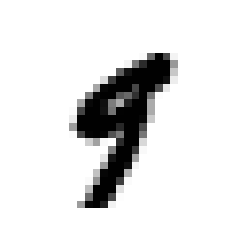

In [5]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off");

In [6]:
y[36000]

'9'

As you can see, the labels are stored as strings, not as numbers. So let's convert those to integers:

In [7]:
y = y.astype(np.uint8)
y[36000]

9

### Exercise

Use python to inspect the MNIST dataset you downloaded above concerning its number of instances (available for training and testing), number of features and their value ranges.

### Questions

1. How many instances has the MNIST dataset?
2. How many features has the MNIST dataset? Why?
3. What is the value range of the features of the MNIST dataset? Why?
4. How many label does the dataset have?
5. Are we bound to use semi-supervised learning methods?

### Answer

1. 
2. 
3. 
4. 
5. 

### Exercise

Train a simple `SGDClassifier` with `loss="hinge", random_state=42` (default parameters otherwise) on the training set and compute the [F1-Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) **per class** on the test set.\
Time both the execution of the training and the testing using `%time` before the actual code line.

Then [plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.matshow.html) the test set [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), with rows being the true class and columns being the predicted classes. 

*Hint:* set the diagonal elements of the matrix [to zero](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fill_diagonal.html) to make the errors more visible.

In [8]:
## train SGD and then predict labels for the test set 


In [9]:
## F1-score


In [10]:
## generate confusion matrix


In [11]:
## plot confusion matrix


### Questions

- Looking at your confusion matrix, which seems to be the most common mistake of the classifier? 
- Why do you think it makes this mistake?

#### Answer



### Exercise

Now use the function of scikit-learn to do a 4-fold CV on the same classifier, with `scoring="accuracy"` and `n_jobs=-1` to make use of all your CPU cores and time the execution.

In [12]:
## CV


### Question

Independent of your timing result: On a machine with 4 CPU cores the 4-fold CV is generally faster than the training with `clf.fit(X_train, y_train)`.\
Why?

### Answer



### Exercise
Now scale the data to zero mean and unit variance. Use the scikit-learn function `StandardScaler` for that.\
Then run 4-fold CV again and plot the confusion matrix (as above).

In [13]:
## scale features


In [14]:
## CV/train SGD from above again with scaled features


In [15]:
## confusion matrix plot


### Questions

1. Which learning algorithm does the `SGDClassifier` use under the hood in this example? 
2. Why does the scaling improve the result?

### Answer



### Exercise

Train a `DecisionTreeClassifier` (dt) on the training set and compute the `macro` averaged F1-Score on the test set. **Make sure to avoid overfitting by using the regularization hyper-parameters!** (You can also use GridSearch to find good parameters)

In [16]:
## train dt and then predict labels for the test set


In [17]:
## averaged F1-Score on the test set


### Exercise

Train a Random Forest classifier `RandomForestClassifier` (rf) and an Extra-Trees classifier `ExtraTreesClassifier` (et), each with 100 estimators and `random_state=42` (for determinism).

In [18]:
## instanciate rf and et


In [19]:
## train rf and et 


In [20]:
## predict labels for the test set


### Exercise

Compute the `accuracy_score` on the test set for each of the 4 classifiers from Exercise 1-4.

Then, combine the 4 classifiers into one `VotingClassifier` (vc) ensemble and compute the accuracy on the test set for this ensemble.

In [21]:
## socre all

In [22]:
## train vc


In [23]:
## predict labels for the test set


### Question

All four classifiers in the ensemble were trained on the same dataset (ie., no bagging, pasting, boosting). Could an ensemble still achieve a higher prediction accuracy than the individual classifiers (regardless of whether it actually happened here)? Why?

#### Answer



### Optional

Construct a Gaussian kernel [Support Vector Machine](http://scikit-learn.org/stable/modules/svm.html) with `C=5, gamma=0.05` and check if the `VotingClassifier` can be improved with that additional classifier (this increases the compute time by about 30 minutes or longer).